In [5]:
import numpy as np
from matplotlib import pyplot as plt

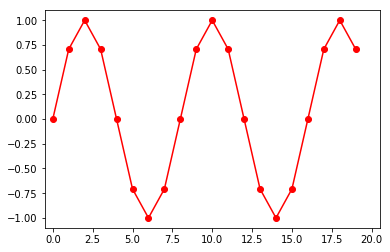

In [6]:
s = np.sin(2*np.pi*0.125*np.arange(20))
plt.plot(s,'ro-')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.show()

In [7]:
s.shape

(20,)

In [8]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [9]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

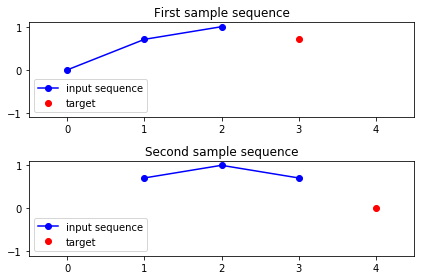

In [10]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [13]:
np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation="linear"))
model.compile(loss = 'mse', optimizer = 'sgd')

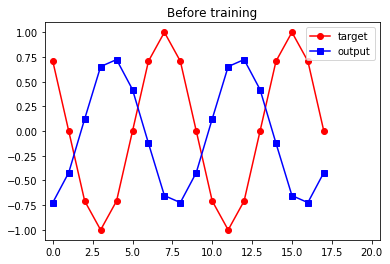

In [14]:
plt.plot(Y_train, 'ro-', label = 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label = 'output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [16]:
#training
history = model.fit(X_train, Y_train, epochs = 100, verbose=0)

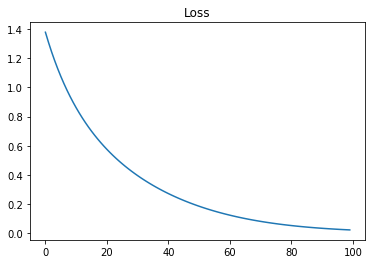

In [17]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

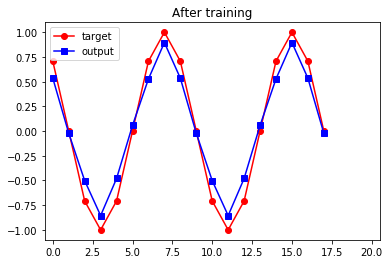

In [18]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [19]:
from keras.layers import TimeDistributed

In [20]:
model2 = Sequential()
model2.add(SimpleRNN(10, return_sequences=True, input_shape = (3,1)))
model2.add(TimeDistributed(Dense(1,activation='linear')))
model.compile(loss = 'mse', optimizer='sgd')

In [22]:
X_train2 = S[:-3, 0:3][:, :, np.newaxis]
Y_train2 = S[:-3, 3:6][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((16, 3, 1), (16, 3, 1))

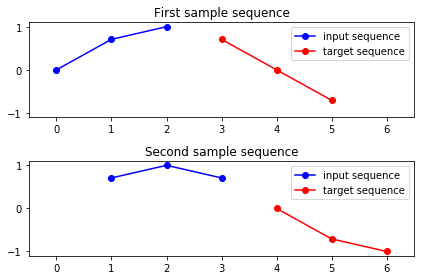

In [23]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train2[0].flatten(), 'bo-', label="input sequence")
plt.plot([3, 4, 5], Y_train2[0].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

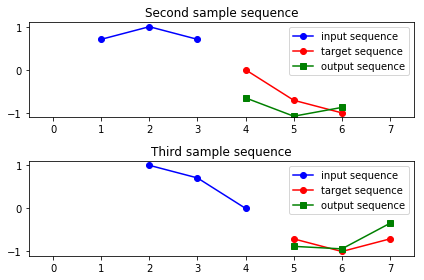

In [24]:
plt.subplot(211)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.plot([4, 5, 6], model2.predict(X_train2[1:2,:,:]).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.subplot(212)
plt.plot([2, 3, 4], X_train2[2].flatten(), 'bo-', label="input sequence")
plt.plot([5, 6, 7], Y_train2[2].flatten(), 'ro-', label="target sequence")
plt.plot([5, 6, 7], model2.predict(X_train2[2:3,:,:]).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Third sample sequence")
plt.tight_layout()
plt.show()